In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('dulieugiaodich.csv')
data['Ngày'] = pd.to_datetime(data['Ngày'])

In [3]:
data.head()

,STT,Ngày,Mã CK,Tham chiếu,Mở cửa,Đóng cửa,Cao nhất,Thấp nhất,Trung bình,Thay đổi add/sub,Thay đổi percent,GD khớp lệnh KL,GD khớp lệnh GT,GD thỏa thuận KL,GD thỏa thuận GT,Tổng giao dịch KL,Tổng giao dịch GT,Vốn hóa thị trường
0,1,2022-12-30,AAA,6.86,6.89,6.83,6.90,6.78,6.82,-30.0,-0.44,1032000,7041,0,0,1032000,7041,2610934
1,2,2022-12-30,AAM,11.85,11.90,11.45,11.90,11.45,11.89,-400.0,-3.38,5300,63,0,0,5300,63,119666
2,3,2022-12-30,AAT,5.09,5.10,4.96,5.10,4.96,5.01,-130.0,-2.55,454900,2278,0,0,454900,2278,316455
3,4,2022-12-30,ABR,8.71,8.71,8.71,8.71,8.71,0.00,0.0,0.00,0,0,0,0,0,0,174200
4,5,2022-12-30,ABS,5.35,5.47,5.22,5.47,5.20,5.32,-130.0,-2.43,555400,2957,0,0,555400,2957,417600


In [4]:
data.info()
#Nhìn vào dữ liệu có thể thấy rằng có những dòng dữ liệu null và Sàn cùng với Ngành nghề là 2 dữ liệu loại object sẽ không ảnh hưởng đến dữ liệu nên cần loại bỏ)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148749 entries, 0 to 148748
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   STT                 148749 non-null  int64         
 1   Ngày                148749 non-null  datetime64[ns]
 2   Mã CK               148749 non-null  object        
 3   Tham chiếu          148749 non-null  float64       
 4   Mở cửa              148749 non-null  float64       
 5   Đóng cửa            148749 non-null  float64       
 6   Cao nhất            148749 non-null  float64       
 7   Thấp nhất           148749 non-null  float64       
 8   Trung bình          148749 non-null  float64       
 9   Thay đổi add/sub    148749 non-null  float64       
 10  Thay đổi percent    148749 non-null  float64       
 11  GD khớp lệnh KL     148749 non-null  int64         
 12  GD khớp lệnh GT     148749 non-null  int64         
 13  GD thỏa thuận KL    148749 no

In [5]:
#loại bỏ những cột dữ liệu không cần thiết
# data.drop(['Ghép 01','Ghép 02','Ngành nghề', 'Sàn'], axis=1, inplace= True)

Vì dữ liệu đẹp nên ta không cần thiết sử dụng các kĩ thuật thuật toán ví dụ như linear regession k-nearest, naive bayers để mô hình dữ liệu từ đó đưa ra dự doán cho dữ liệu thiếu

In [6]:
#kiểm tra thấy dòng dữ liệu không có dữ liệu null trong những column còn lại nên xem xét sử dụng các kĩ thuật loại bỏ dữ liệu lỗi
data.drop_duplicates() # loại bỏ dữ liệu trùng nhau

,STT,Ngày,Mã CK,Tham chiếu,Mở cửa,Đóng cửa,Cao nhất,Thấp nhất,Trung bình,Thay đổi add/sub,Thay đổi percent,GD khớp lệnh KL,GD khớp lệnh GT,GD thỏa thuận KL,GD thỏa thuận GT,Tổng giao dịch KL,Tổng giao dịch GT,Vốn hóa thị trường
0,1,2022-12-30,AAA,6.86,6.89,6.83,6.90,6.78,6.82,-30.0,-0.44,1032000,7041,0,0,1032000,7041,2610934
1,2,2022-12-30,AAM,11.85,11.90,11.45,11.90,11.45,11.89,-400.0,-3.38,5300,63,0,0,5300,63,119666
2,3,2022-12-30,AAT,5.09,5.10,4.96,5.10,4.96,5.01,-130.0,-2.55,454900,2278,0,0,454900,2278,316455
3,4,2022-12-30,ABR,8.71,8.71,8.71,8.71,8.71,0.00,0.0,0.00,0,0,0,0,0,0,174200
4,5,2022-12-30,ABS,5.35,5.47,5.22,5.47,5.20,5.32,-130.0,-2.43,555400,2957,0,0,555400,2957,417600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148744,409,2024-06-14,VTB,10.70,10.70,11.20,11.20,10.70,10.86,500.0,4.67,5800,63,0,0,5800,63,121010
148745,410,2024-06-14,VTO,13.70,13.70,12.75,13.85,12.75,13.29,-950.0,-6.93,2887700,38380,0,0,2887700,38380,1018299
148746,411,2024-06-14,VTP,82.60,83.40,86.80,88.30,82.90,86.78,4200.0,5.08,5010300,434779,0,0,5010300,434779,10570768
148747,412,2024-06-14,YBM,11.20,11.20,11.50,11.50,11.20,11.25,300.0,2.68,1600,18,0,0,1600,18,164448


In [7]:
data1 = data['Mã CK'].value_counts()

In [8]:
print(data1)

Mã CK
AAA         360
PSH         360
S4A         360
REE         360
RDP         360
           ... 
HAI          71
NAB          67
VTP          65
FUEKIVND     35
FLC          30
Name: count, Length: 431, dtype: int64


Đánh giá thấy có những mã chứng khoán có số lượng quá nhỏ không thể thực hiện dự đoán, hoặc do mã chứng khoán đó đã không còn trên thị trường, nên sẽ loại bỏ những mã chứng khoán có số lượng nhỏ hơn 200

In [9]:
data2=data1[data1>=200].index

In [10]:
data = data[data['Mã CK'].isin(data2)]

In [11]:
data.describe() # thống kê thông tin cho các code dữ liệu loại số 

,STT,Ngày,Tham chiếu,Mở cửa,Đóng cửa,Cao nhất,Thấp nhất,Trung bình,Thay đổi add/sub,Thay đổi percent,GD khớp lệnh KL,GD khớp lệnh GT,GD thỏa thuận KL,GD thỏa thuận GT,Tổng giao dịch KL,Tổng giao dịch GT,Vốn hóa thị trường
count,146883.000000,146883,146883.000000,146883.000000,146883.000000,146883.000000,146883.000000,146883.000000,146883.00000,146883.000000,1.468830e+05,1.468830e+05,1.468830e+05,1.468830e+05,1.468830e+05,1.468830e+05,1.468830e+05
mean,207.065807,2023-09-23 15:15:36.524988928,25.102905,25.117035,25.125127,25.402068,24.812808,23.001422,22.22170,0.102210,1.712809e+06,3.751156e+04,1.789442e+05,4.293310e+03,1.891754e+06,4.180487e+04,1.132554e+07
min,1.000000,2022-12-30 00:00:00,1.230000,1.230000,1.230000,1.310000,1.230000,0.000000,-18200.00000,-7.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.925000e+04
25%,103.000000,2023-05-18 00:00:00,9.450000,9.450000,9.450000,9.570000,9.310000,7.760000,-100.00000,-0.770000,6.300000e+03,1.060000e+02,0.000000e+00,0.000000e+00,6.500000e+03,1.100000e+02,3.655130e+05
50%,207.000000,2023-09-25 00:00:00,16.900000,16.900000,16.900000,17.100000,16.730000,15.160000,0.00000,0.000000,1.271000e+05,1.730000e+03,0.000000e+00,0.000000e+00,1.404000e+05,1.909000e+03,1.326416e+06
75%,311.000000,2024-01-29 00:00:00,33.000000,33.000000,33.000000,33.350000,32.650000,30.730000,150.00000,0.900000,1.095500e+06,2.210650e+04,0.000000e+00,0.000000e+00,1.235200e+06,2.485950e+04,4.504492e+06
max,417.000000,2024-06-14 00:00:00,262.900000,262.900000,262.900000,262.900000,262.900000,260.000000,16200.00000,19.960000,1.271032e+08,3.164759e+06,2.052889e+08,5.963642e+06,2.150565e+08,6.232443e+06,5.443775e+08
std,119.497205,NaN,23.984756,24.004612,24.006775,24.222424,23.775783,23.606634,703.89879,2.269557,4.708141e+06,1.073778e+05,1.602958e+06,3.999846e+04,5.185771e+06,1.197555e+05,3.740026e+07


Dữ liệu có sử dụng là dữ liệu 1400000 dữ liệu, mỗi mã chứng khoán có dữ liệu không phải là dữ liệu classification và là đầu ra là predict dữ liệu nên không sử dụng over sampling hay undersampling
khi thực hiện thuật toán ta sử dụng thêm cross-validation để tăng dữ liệu tăng độ chính xác

Vì là dữ liệu loại số và cột dữ liệu Mã chứng khoán thì phải để ở đúng dạng để có thể dễ dàng phân biệt, nên những dữ liệu dạng số này không cần sử dụng encoding data( label, one-hot, embedding)

In [12]:
# Chọn features cho dữ liệu huấn luyện chính

Ma trận tương quan: Hiển thị hệ số tương quan giữa các đặc trưng, cho biết mức độ và hướng của mối quan hệ giữa chúng.
Heatmap: Cung cấp biểu đồ trực quan của ma trận tương quan, giúp dễ dàng nhận biết các đặc trưng có tương quan mạnh
Xác định những đặc trưng có tương quan mạnh với Đóng cửa. Các đặc trưng có giá trị tương quan tuyệt đối cao hơn có mối quan hệ mạnh hơn với biến mục tiêu và có thể hữu ích hơn trong mô hình dự đoán.
Mở cửa: Tương quan rất mạnh với Đóng cửa.
Cao nhất: Cũng có tương quan cao với Đóng cửa.
Thấp nhất: Tương quan mạnh với Đóng cửa. 
Trung bình: Tương quan rất cao với Đóng cửa.
GD khớp lệnh KL: Có tương quan vừa phải với Đóng cửa

In [13]:
data3=data.drop(columns=['Mã CK'])

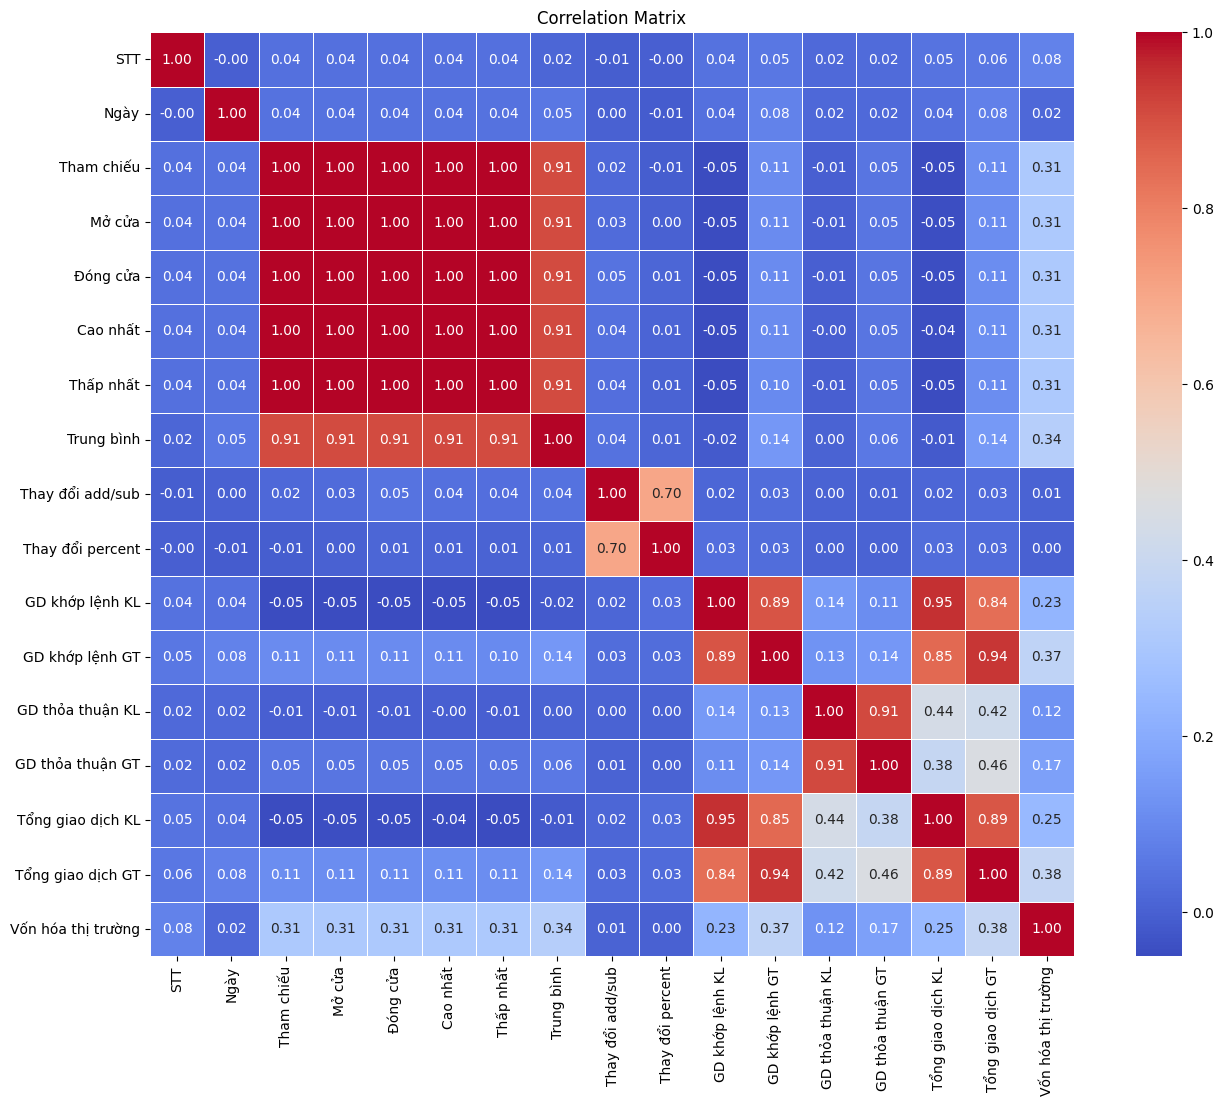

In [14]:
corr_matrix = data3.corr() # tương quan giữ các dữ liệu số (-1 đến 1)

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [15]:
features = ['Mở cửa', 'Cao nhất', 'Thấp nhất', 'Trung bình', 'GD khớp lệnh KL', 'Vốn hóa thị trường'] # chọn thêm để đánh giá sự ảnh hưởng của các dữ liệu có tác động lớn đến dữ liệu cột đóng cửa


Đồ thị tán xạ: Hiển thị mối quan hệ giữa từng đặc trưng và biến mục tiêu Đóng cửa. Điều này giúp kiểm tra trực quan xem có bất kỳ xu hướng hay mẫu nào đáng chú ý chỉ ra mối quan hệ mạnh không.
Kiểm tra trực quan bổ sung cho ma trận tương quan bằng cách cung cấp cái nhìn đồ họa về các mối quan hệ. Nó giúp thấy rõ các mối quan hệ là tuyến tính hay có các mẫu khác không mà hệ số tương quan không thể hiện
Đánh giá là côn hóa thị trường ảnh hưởng không rõ ràng như những thằng kia, nhưng khớp lệnh cũng có thể phân vân rằng nó không hiệu quả

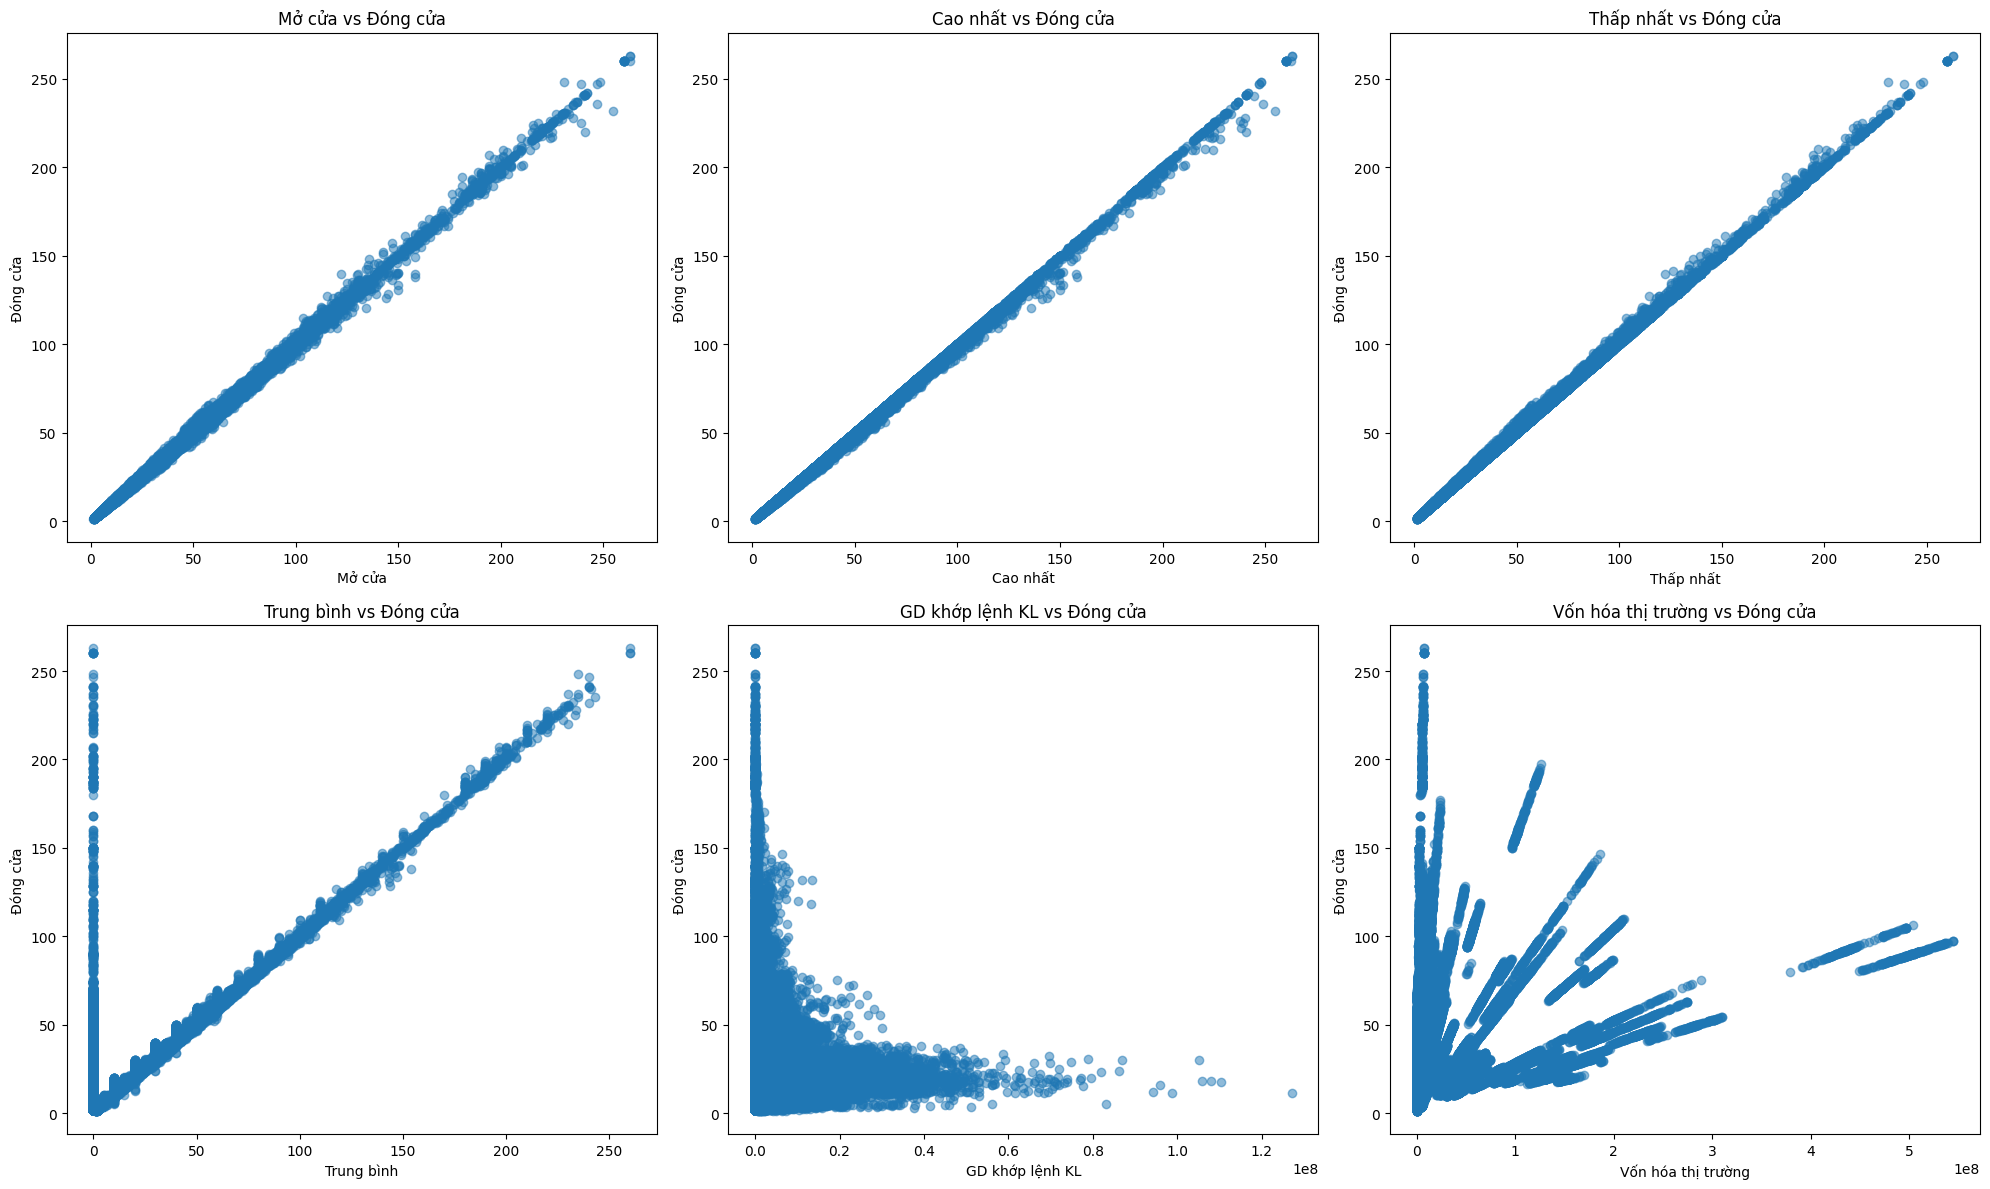

In [16]:
plt.figure(figsize=(20, 12))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i + 1)
    plt.scatter(data[feature], data['Đóng cửa'], alpha=0.5)
    plt.title(f'{feature} vs Đóng cửa')
    plt.xlabel(feature)
    plt.ylabel('Đóng cửa')
plt.tight_layout()
plt.show()

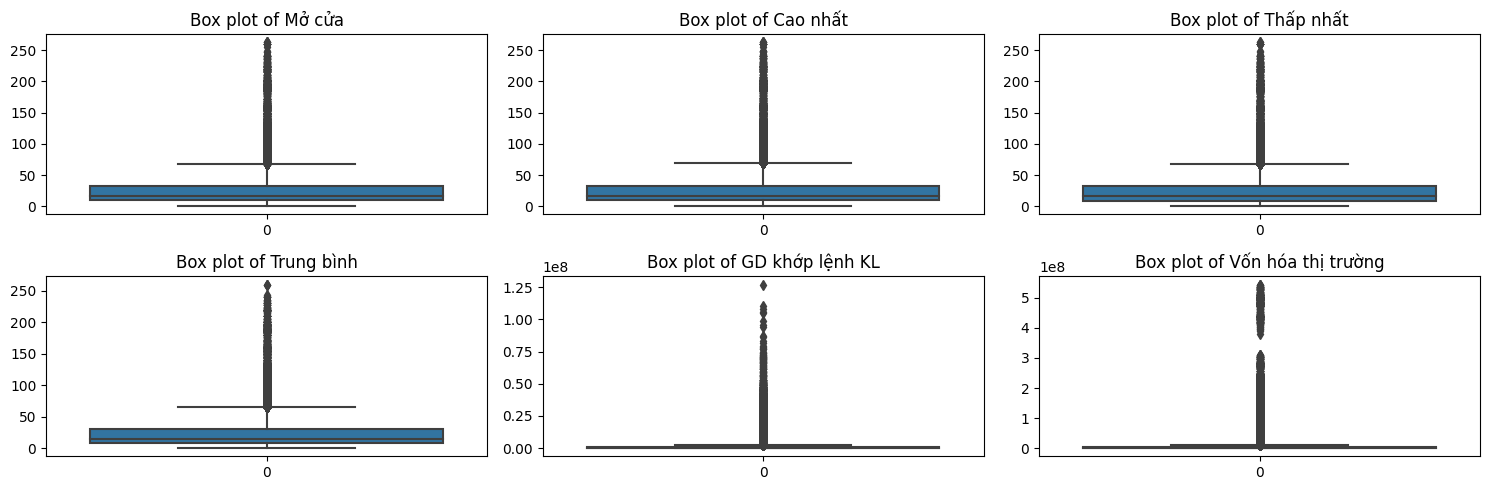

In [17]:
## cái này để đây rồi xem xét thêm chứ ngoại lại tại mỗi ngày thì ngoại lai nhưng với dữ liệu chứng khoán thì bất cứ thay đổi nào đều ảnh hưởng nên không thể tính đến dữ liệu ngoại lai cho dữ liệu loại này nhưng vẫn đưa ra vẽ ở đây 
plt.figure(figsize=(15, 5))

for i, feature in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data[feature])
    plt.title(f'Box plot of {feature}')

plt.tight_layout()
plt.show()


In [18]:
# chuẩn hóa dư liệu với minmax Scaler
#Min-Max Scaler là một kỹ thuật chuẩn hóa dữ liệu nhằm đưa tất cả các giá trị của biến về trong một khoảng giá trị nhất định, thường là [0, 1]. Kỹ thuật này làm cho dữ liệu có giá trị tối thiểu bằng 0 và giá trị tối đa bằng 1.
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[features])


with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
đưa vào pickle để lưu trữ lại

 từ đó ta có thể thấy ta nên chọn các dòng dữ liệu là mở cửa, đóng cửa, thấp nhất, trung bình, GD khớp lệnh KL
 

In [19]:
# đưa thành bộ dữ liệu đẹp đã xử lí để đưa vào mô hình
data.to_csv('dulieuthunho.csv')